C:\software\Anaconda3\lib\site-packages\sklearn\cross_validation.py:553: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


Best test score: 0.9648


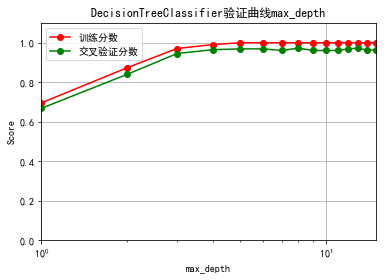

In [52]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filepath = 'test.xls'

data = pd.read_excel(filepath, encoding='utf-8')

data.loc[(data[u'空气等级']=='I'),u'空气等级']=1
data.loc[(data[u'空气等级']=='II'),u'空气等级']=2
data.loc[(data[u'空气等级']=='III'),u'空气等级']=3
data.loc[(data[u'空气等级']=='IV'),u'空气等级']=4
data.loc[(data[u'空气等级']=='V'),u'空气等级']=5
data.loc[(data[u'空气等级']=='VI'),u'空气等级']=6
data.loc[(data[u'空气等级']=='VII'),u'空气等级']=7

dataT = data.values
#data.to_excel('data.xls')

# 划分训练集和测试集
from sklearn.cross_validation import train_test_split
train,test,train_target,test_target=train_test_split(dataT[:,:6],dataT[:,6],test_size = 0.2)
train_target=train_target.astype(int)
test_target=test_target.astype(int)

#构建决策树模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

clf = DecisionTreeClassifier(max_depth=8)

"""

from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, X, y, ylim=(0, 1.1), cv=3,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),
                        scoring=None):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.title("%s —学习曲线" % type(estimator).__name__)
    plt.ylim(*ylim); plt.grid()
    plt.xlabel("训练集")
    plt.ylabel("分数")
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="训练分数")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
             label="交叉验证分数")
    plt.legend(loc="best")
    print("最好的测试分数为：{:.4f}".format(train_scores_mean[-1]))

plot_learning_curve(clf, train, train_target) 

"""
#利用validation_curve计算不同深度训练集和测试集交叉验证得分
from sklearn.learning_curve import validation_curve
def plot_validation_curve(estimator, X, y, param_name, param_range,
                          ylim=(0, 1.1), cv=3, n_jobs=1, scoring=None):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    estimator_name = type(estimator).__name__
    plt.title(" %s验证曲线%s "
              % (estimator_name,param_name))
    plt.ylim(*ylim); plt.grid()
    plt.xlim(min(param_range), max(param_range))
    plt.xlabel(param_name)
    plt.ylabel("分数")

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name, param_range,
        cv=cv, n_jobs=n_jobs, scoring=scoring)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.semilogx(param_range, train_scores_mean, 'o-', color="r",
                 label="训练分数")
    plt.semilogx(param_range, test_scores_mean, 'o-', color="g",
                 label="交叉验证分数")
    plt.legend(loc="best")
    print("Best test score: {:.4f}".format(test_scores_mean[-1]))

clf = DecisionTreeClassifier(max_depth=8)
param_name = 'max_depth'
param_range = [1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

plot_validation_curve(clf, train*30, train_target,
                      param_name, param_range)